In [38]:
#%load_ext autoreload
#%autoreload 2
import better_pipeline as bp
import pipeline as pl
import pandas as pd
import numpy as np

## Step 1. Reading the data

In [39]:
data = pl.read_data('/home/student/Downloads/projects_2012_2013.csv')

## Step 2. Data Exploration
We have a caveat for doing data exploration right now: all the possible candidates for features are in string forms. First, we need to convert all the variables so we can work with them, which involves a work of pre-processing the data.

In [40]:
pl.df_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124976 entries, 0 to 124975
Data columns (total 26 columns):
projectid                                 124976 non-null object
teacher_acctid                            124976 non-null object
schoolid                                  124976 non-null object
school_ncesid                             115743 non-null float64
school_latitude                           124976 non-null float64
school_longitude                          124976 non-null float64
school_city                               124976 non-null object
school_state                              124976 non-null object
school_metro                              109752 non-null object
school_district                           124804 non-null object
school_county                             124976 non-null object
school_charter                            124976 non-null object
school_magnet                             124976 non-null object
teacher_prefix                           

In [41]:
pl.df_head(data)

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


In [42]:
pl.df_description(data)

,school_ncesid,school_latitude,school_longitude,total_price_including_optional_support,students_reached
count,1.157430e+05,124976.000000,124976.000000,124976.000000,124917.000000
mean,2.448448e+11,36.827284,-95.859299,654.011811,95.445760
std,1.644728e+11,4.963669,18.392876,1098.015854,163.481912
min,1.000050e+10,18.249140,-171.690554,92.000000,1.000000
25%,6.344101e+10,33.872504,-117.806418,345.810000,23.000000
50%,2.200870e+11,36.617410,-90.101563,510.500000,30.000000
75%,3.704880e+11,40.676156,-80.713740,752.960000,100.000000
max,6.100010e+11,65.672562,-66.628036,164382.840000,12143.000000


In [43]:
pl.df_missing_values(data)

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              9233
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_metro                              15224
school_district                             172
school_county                                 0
school_charter                                0
school_magnet                                 0
teacher_prefix                                0
primary_focus_subject                        15
primary_focus_area                           15
secondary_focus_subject                   40556
secondary_focus_area                      40556
resource_type                                17
poverty_level                                 0
grade_level                             

Also, we have to construct the label variable: Label variable is 1 if project doesn't get fully funded within the 60 days from date posted, 0 otherwise

In [44]:
data['days_financed'] = pd.to_datetime(data['datefullyfunded']) - pd.to_datetime(data['date_posted'])
data['label'] = data['days_financed'].dt.days.apply(lambda x: 1 if x <= 60 else 0)

##  Step 3. Pre-process the data

We drop the attributes that are not necessary for prediction. These are 'projectid', 'teacher_acctid', 'schoolid','school_ncesid', which are identifiers. 
Also, although very important, we will leave behind geographic location attributes:          'school_longitude', 'school_district', 'school_county', 'school_city' and 'school_state', as well as the  attributes used to construct the label:  'datefullyfunded', 'days_financed'

We fill the missing values of the 'primary_focus_area','resource_type', 'grade_level', 'students_reached'. We didn't do so with secondary_focus_area because there are plenty of missings and would bias our models.


In [45]:
drop_lst = ['projectid', 'teacher_acctid', 'schoolid',
            'school_ncesid', 'school_latitude', 
            'school_longitude', 'school_district', 
            'school_county', 'secondary_focus_subject',
            'secondary_focus_area','primary_focus_subject']
unnecesary_lst = ['datefullyfunded', 'days_financed', 'school_city', 'school_state']
pl.drop_features(data, drop_lst)
pl.drop_features(data, unnecesary_lst)


lst_to_fill = ['primary_focus_area',
               'resource_type', 'grade_level', 'students_reached']
pl.fill_missing(data,lst_to_fill,form = False)

## Step 4. Generate features/predictors
Convert all of the string categories of features to dummies (and eliminate the original features).
Convert continuous features into bins
Do additional transformations

In [46]:
lst_dummies = ['school_metro', 
               'primary_focus_area', 'resource_type', 'poverty_level',
              'grade_level']
data = pl.to_dummies(data,lst_dummies)

pl.drop_features(data, lst_dummies)

In [47]:
d_t = pd.get_dummies(data['teacher_prefix'])
d_t_lst = list(d_t.columns)
d_t['female_teacher'] = d_t['Dr.'] + d_t['Ms.'] + d_t['Mrs.'] 
d_t['male_teacher'] = d_t['Mr.']
pl.drop_features(d_t, d_t_lst)
data.join(d_t)

final_drop = ['teacher_prefix']
pl.drop_features(data, final_drop)

An additional function that is also necesary is the boolean conversor from string to 1/0. Some of the variables are in "t", "f" and we want them to be integers 1/0

In [48]:
tf_dic = {'t': 1, 'f':0}
data = data.replace({'school_charter': tf_dic, 'school_magnet': tf_dic, 'eligible_double_your_impact_match' : tf_dic})


In [49]:
pl.features_quantile(data,['total_price_including_optional_support'],10)
pl.drop_features(data, ['total_price_including_optional_support'])

We can now do the exploratory analysis between the features that will enter the model and our label. 

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


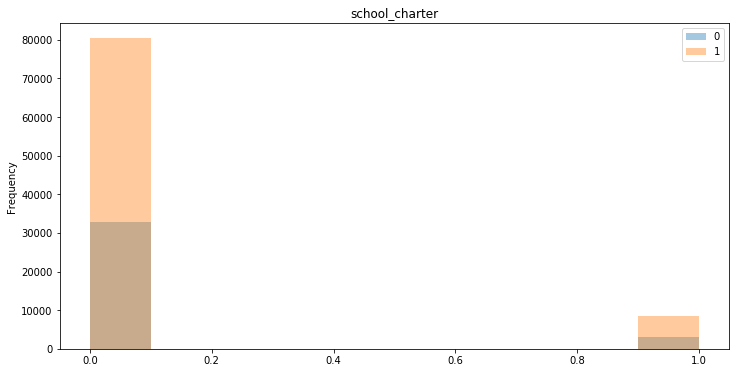

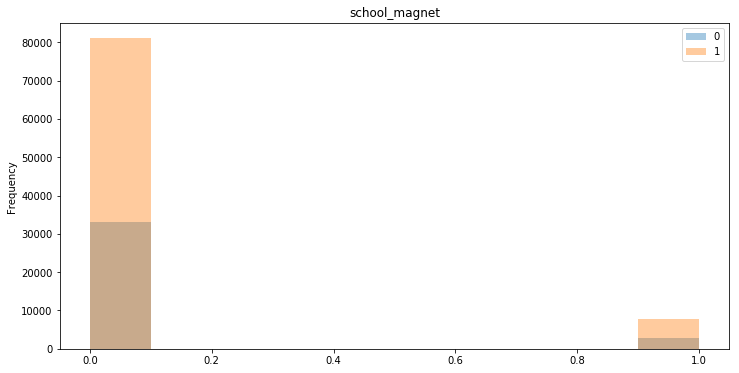

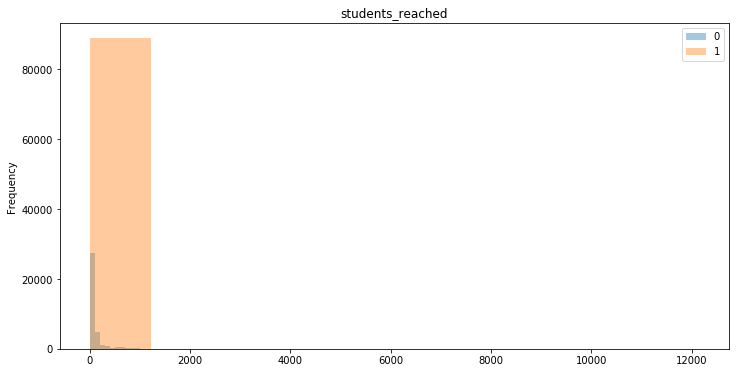

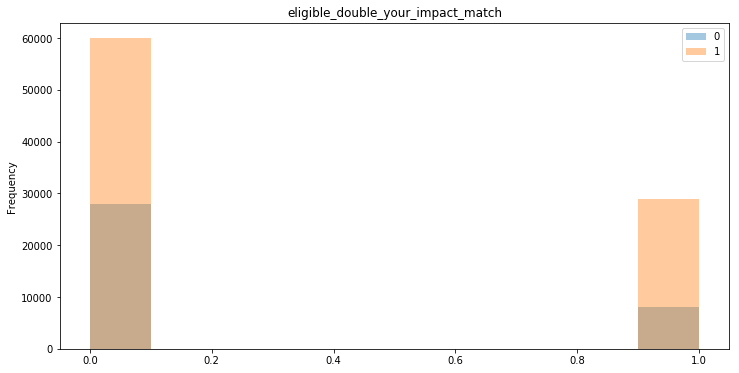

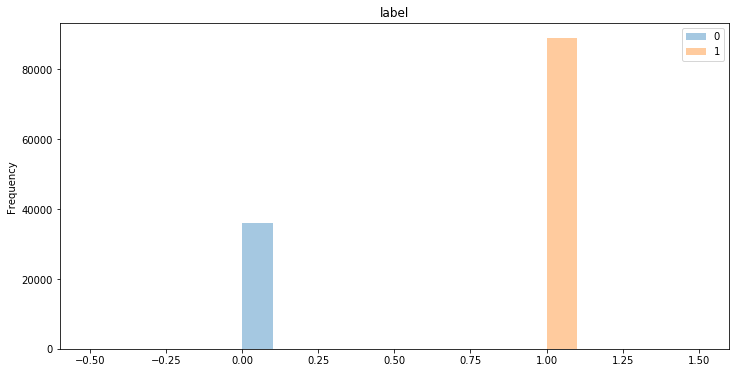

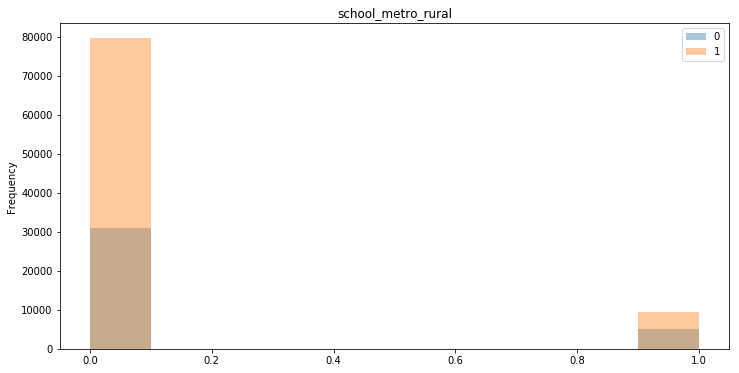

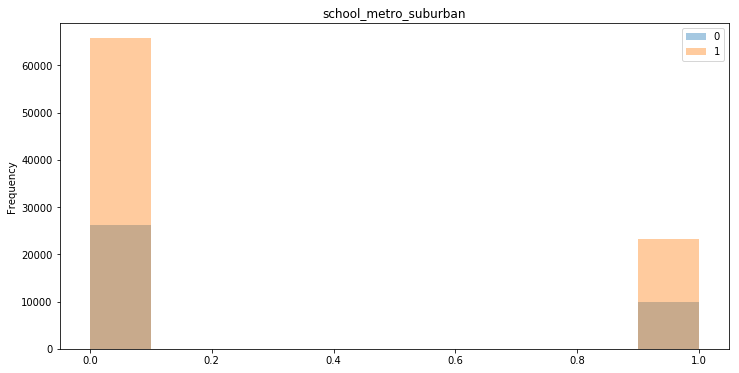

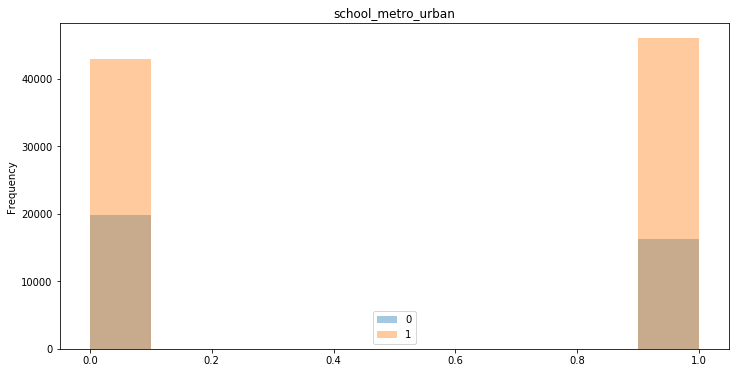

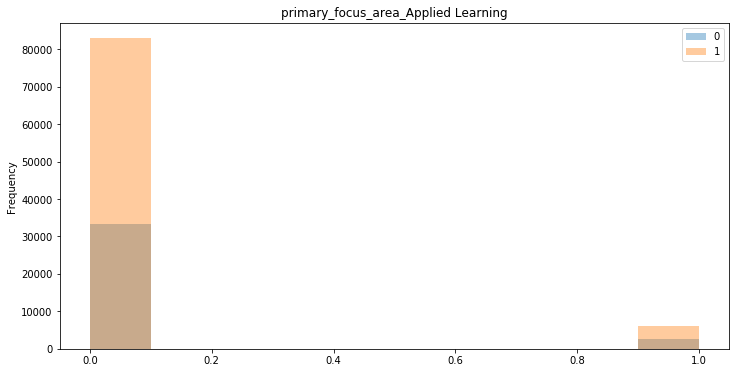

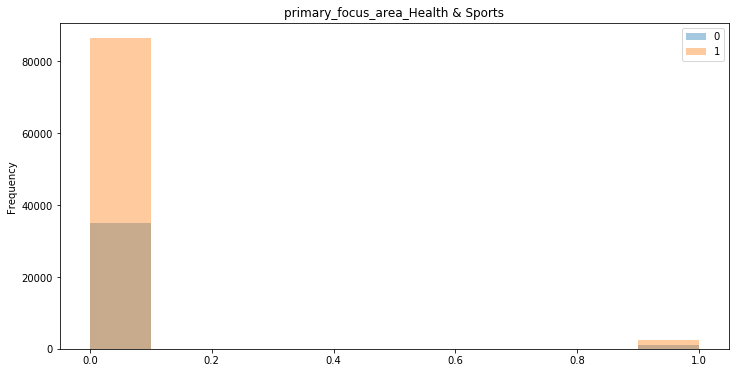

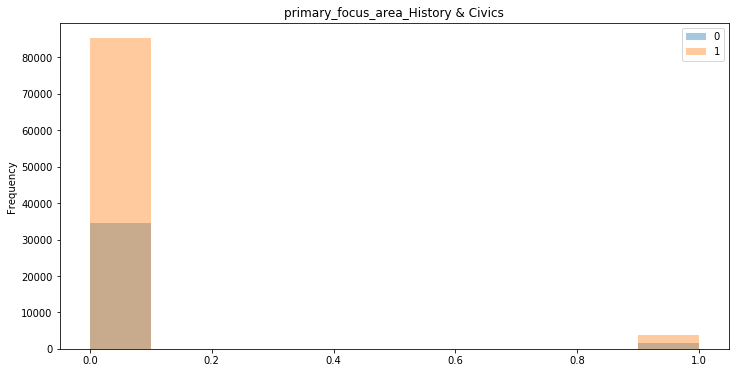

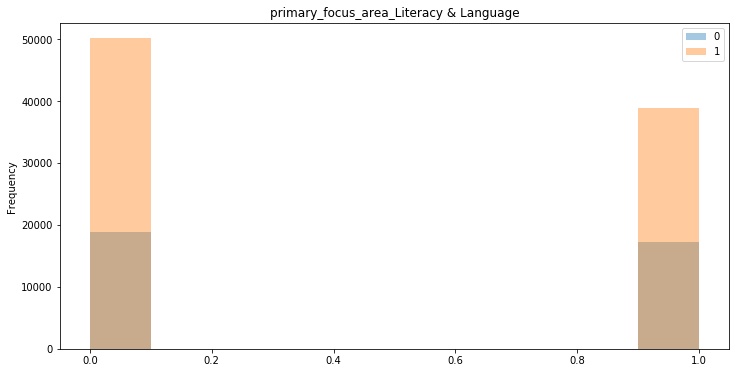

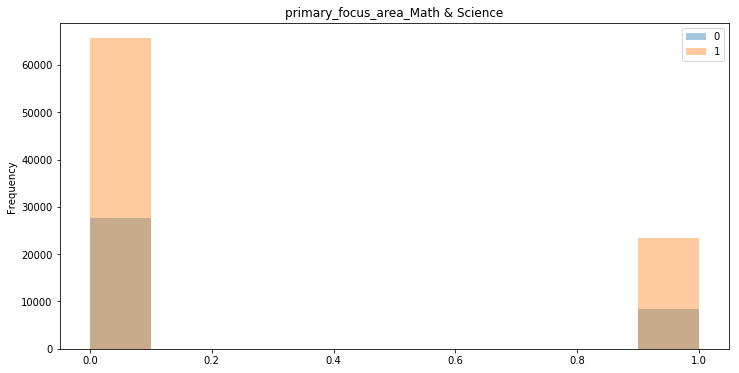

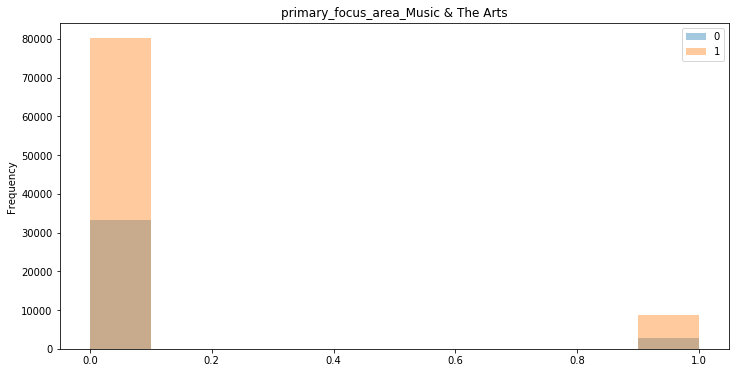

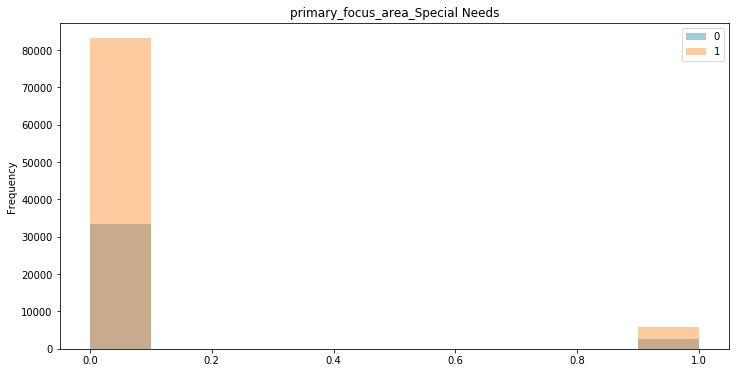

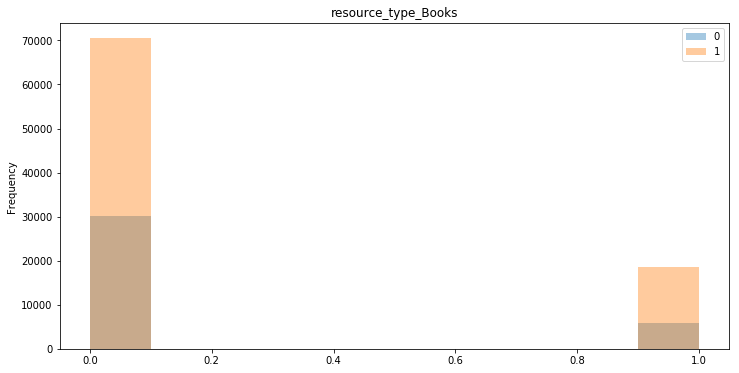

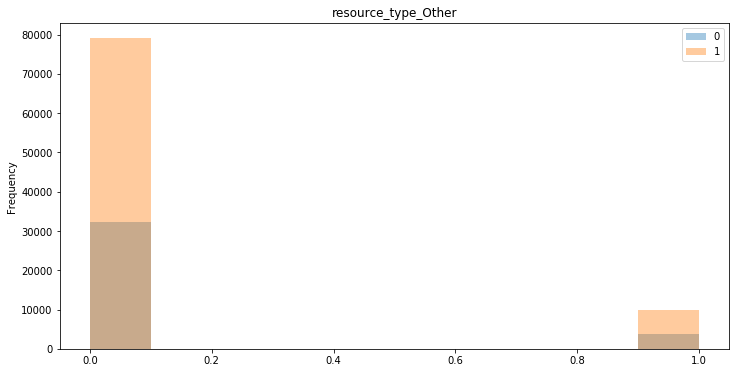

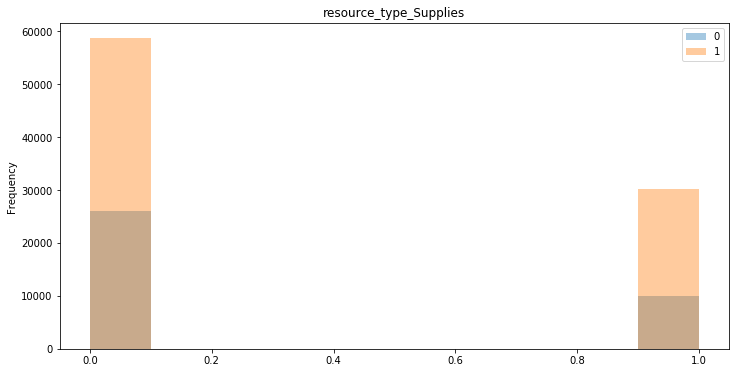

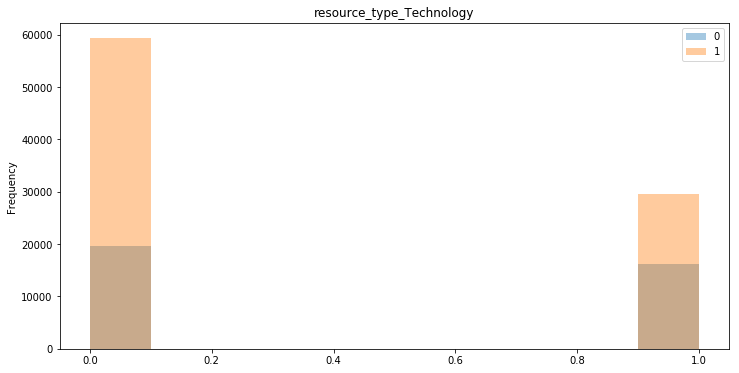

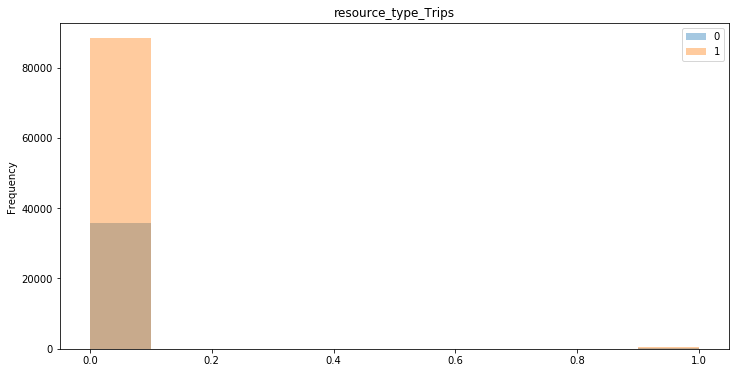

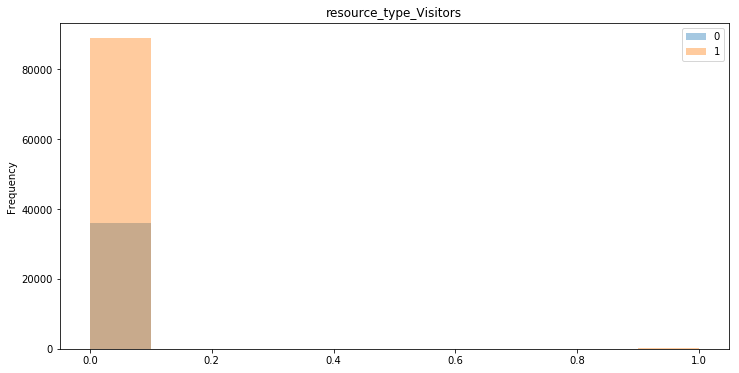

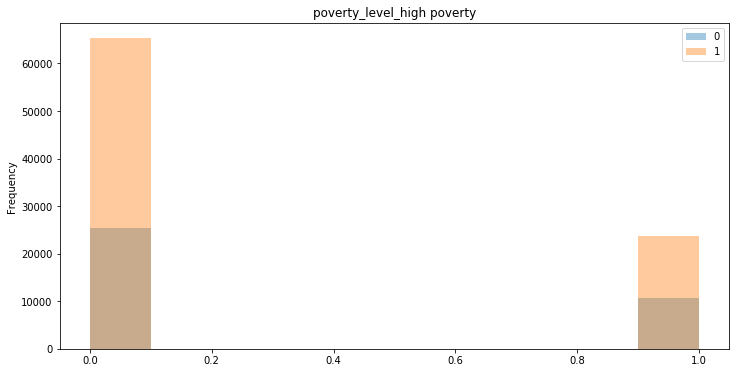

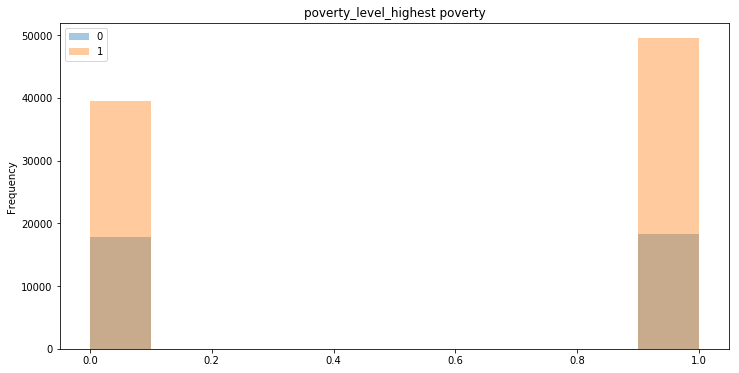

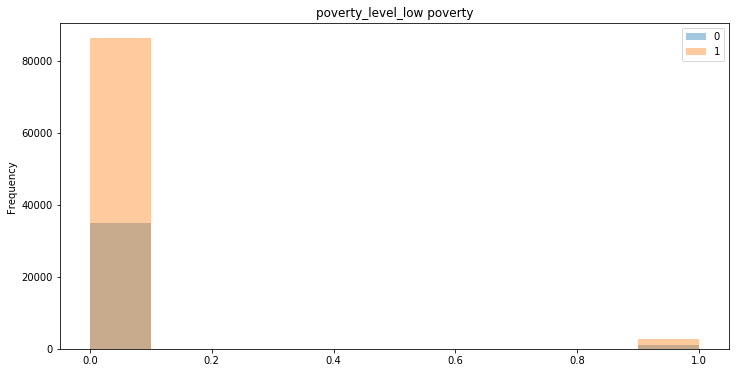

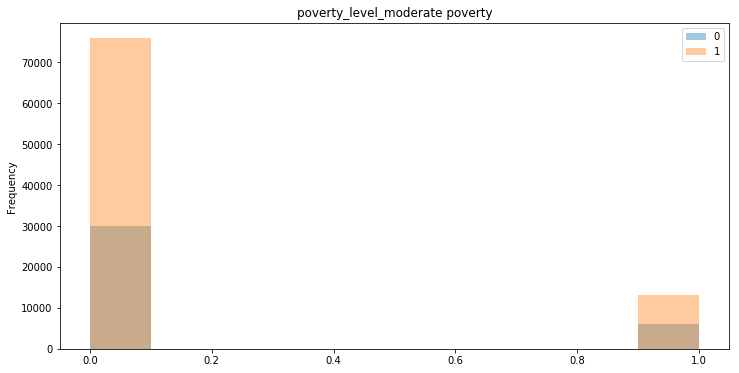

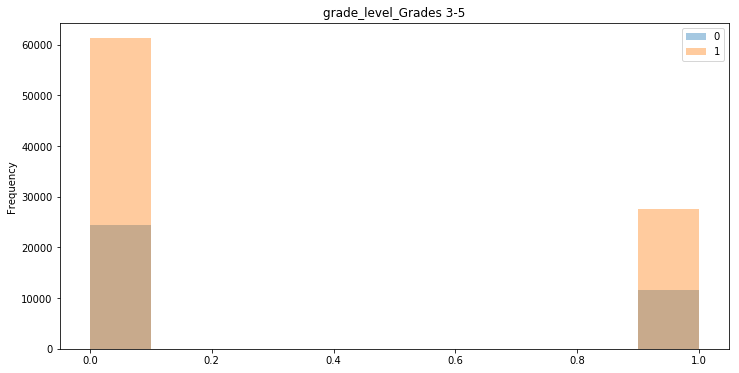

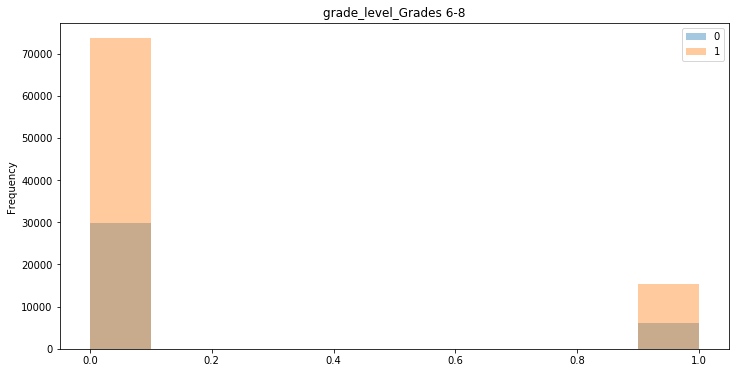

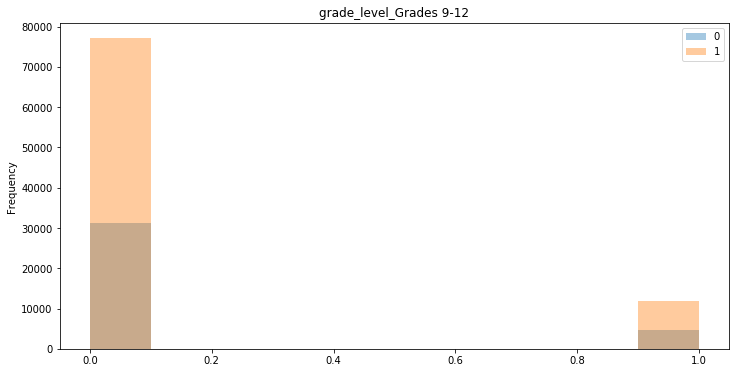

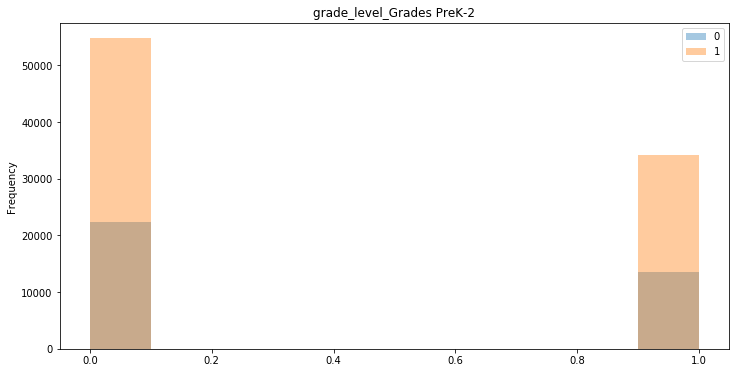

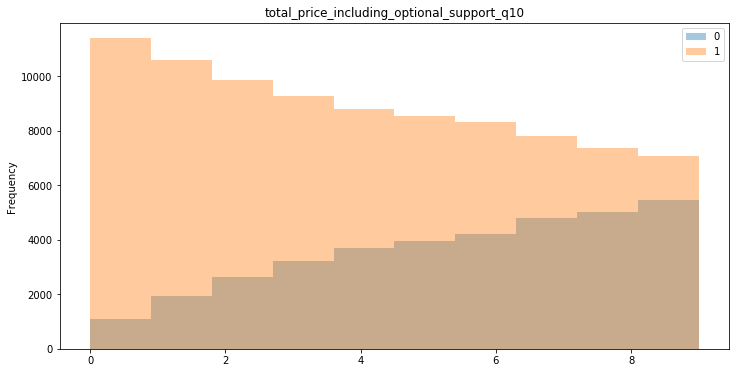

In [50]:
data_to_graph = data.drop(['date_posted'],axis =1)
pl.histogram_by_group(data_to_graph,'label')

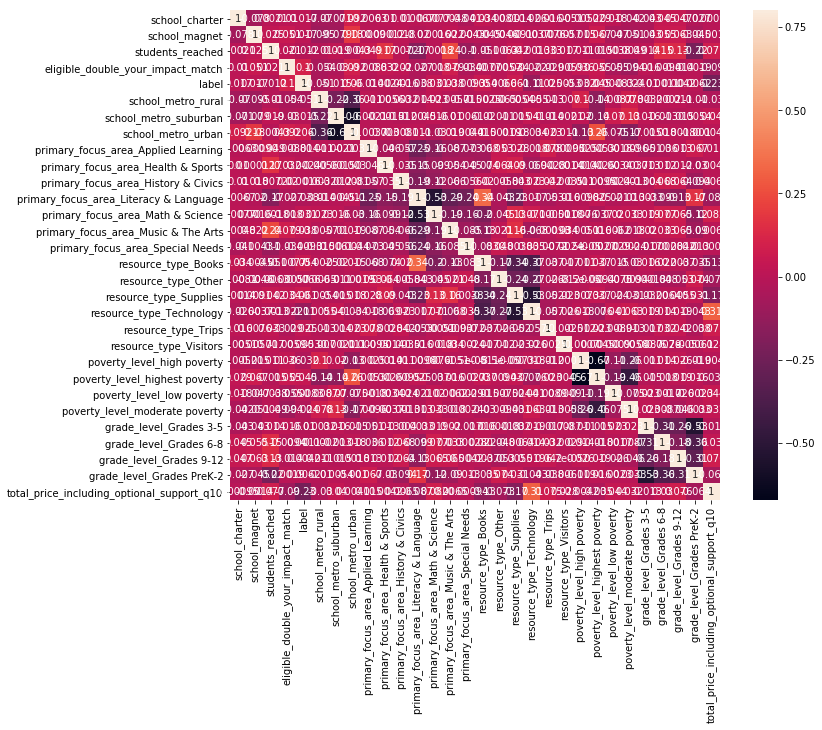

In [52]:
pl.correlation_matrix(data_to_graph)

We observe that the most correlated features with our label are: total_price_including_optional_support, resource_type_technology, eligible_doble_your_impact_match and school_metro_urban

In [ ]:
corr = data_to_graph[data_to_graph.columns].corr()['label']
corr

## Step 5. Build classifier

First we define the temporal window we want to split the data on. For this exercise, we take windows of 6 months, using 6 months for training and the following 6 months for testing, and so on. We have 3 validation sets. 

In [56]:
temp_lst = bp.temp_val('2012-01-01','2013-12-31',6,6)
temp_lst

[[datetime.datetime(2012, 1, 1, 0, 0),
  datetime.datetime(2012, 7, 1, 0, 0),
  datetime.datetime(2012, 7, 2, 0, 0),
  datetime.datetime(2013, 1, 2, 0, 0)],
 [datetime.datetime(2012, 7, 1, 0, 0),
  datetime.datetime(2013, 1, 1, 0, 0),
  datetime.datetime(2013, 1, 2, 0, 0),
  datetime.datetime(2013, 7, 2, 0, 0)],
 [datetime.datetime(2013, 1, 1, 0, 0),
  datetime.datetime(2013, 7, 1, 0, 0),
  datetime.datetime(2013, 7, 2, 0, 0),
  datetime.datetime(2014, 1, 2, 0, 0)]]

In [ ]:
clfs, grid = bp.define_clfs_params('small')
models_to_run=['BAG','SVM','RF','DT','KNN','LR','GB']
results_df_long = bp.clf_loop(models_to_run,clfs,grid,data,'date_posted','label',temp_lst)

BAG
SVM


In [91]:
a.dtypes

projectid                                         object
teacher_acctid                                    object
schoolid                                          object
school_ncesid                                    float64
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                    object
school_magnet                                     object
teacher_prefix                                    object
primary_focus_subject                             object
primary_focus_area                                object
secondary_focus_subject                           object
secondary_focus_area           

In [79]:
results_df = clf_loop(models_to_run,clfs,grid,data,'date_posted','label')

RF
DT
LR
RF
DT
LR
RF
DT
LR
